In [ ]:
from google.colab import files
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest
import numpy as np

In [ ]:
df = pd.read_csv('/content/avocado.csv')


df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d")
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month

df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,day,month
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,27,12
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,20,12
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,13,12
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,29,11


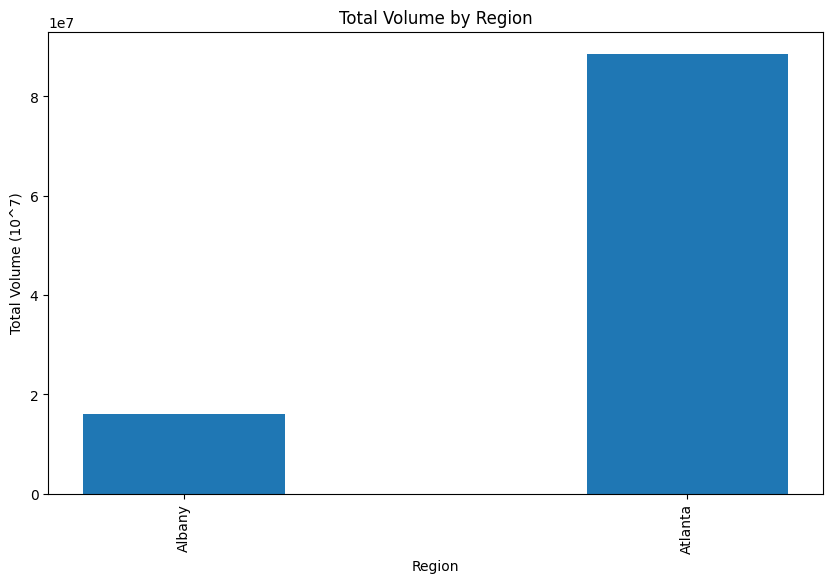

In [ ]:
x = ['Albany', 'Atlanta']
y = []

#for i in df['region']:
  #if i not in x:
    #x.append(i)


for j in x:
  df2 = df.loc[(df['region'] == j)]
  total = sum(df2['Total Volume'])
  y.append(total)

plt.figure(figsize=(10, 6))  # set the figure size
plt.bar(x, y, width=0.4)
plt.xticks(rotation=90)  # rotate the x-axis labels for better visibility
plt.xlabel('Region')
plt.ylabel('Total Volume (10^7)')
plt.title('Total Volume by Region')

plt.show()

1.3324114534100997
1.2644290123456792
1.2853811728395061


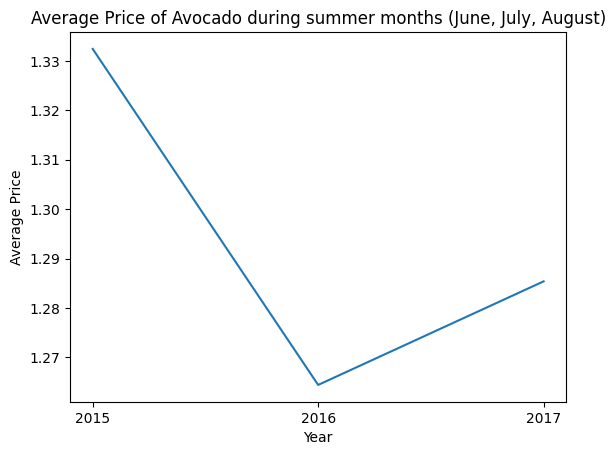

In [ ]:
x = [2015, 2016, 2017]
y = []
#print(df['AveragePrice'][2])
for i in range(2015,2018):
  total = 0

  df2 = df.loc[(df['year'] == i) & (df['month'] == 12)]
  december_average = sum((df2['AveragePrice']))/len(df2)

  df3 = df.loc[(df['year'] == i) & (df['month'] == 1)]
  janurary_average = sum((df3['AveragePrice']))/len(df3)

  df4 = df.loc[(df['year'] == i) & (df['month'] == 2)]
  feburary_average = sum((df4['AveragePrice']))/len(df4)

  total = (december_average + janurary_average + feburary_average) / 3
  print(total)
  y.append(total)

plt.xlabel("Year")
plt.ylabel("Average Price")
plt.title("Average Price of Avocado during summer months (June, July, August)")
plt.xticks(range(len(x)), x)
plt.plot(y)

plt.show()

In [ ]:
import numpy as np
from scipy.stats import ttest_ind

# Suppose you have two arrays of avocado prices for summer and winter months
summer_prices = np.array([1.41766, 1.36516, 1.60309])
winter_prices = np.array([1.33241, 1.26442, 1.28538])

# Calculate the t-test statistic and p-value
t_statistic, p_value = ttest_ind(summer_prices, winter_prices, equal_var=False)

# Print the results
print("t-test statistic:", t_statistic)
print("p-value:", p_value)


t-test statistic: 2.241158200824194
p-value: 0.1371507459210536
